In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/AI_ML_Projects/Electric_Load_Forecasting_Purely_Time_Series_Demo_Project/dipam/spain_energy_market.csv"
data = pd.read_csv(path, sep=",", parse_dates=["datetime"])
data = data[data["name"]=="Demanda programada PBF total"]
data['date'] = pd.to_datetime(data['datetime']).dt.normalize()
#data["date"] =data["datetime"].dt.date
data.set_index("date",inplace = True)
data = data[["value"]]
#data = data.asfreq("D")
#data = data.rename(columns={"value": "energy"})
#data = data.drop(['id','name','geoid','geoname'],axis =1)
data.head(5)

,value
date,
2014-01-01,620107.7
2014-01-02,659865.2
2014-01-03,632536.8
2014-01-04,610251.7
2014-01-05,572534.1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


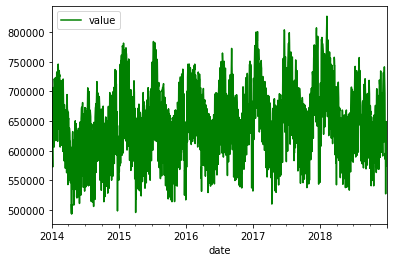

In [4]:
data.plot(color='green')

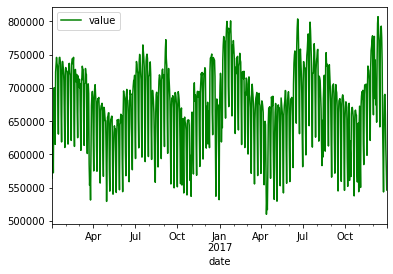

In [5]:
data_2017 = data[(data.index>'2016-01-01') & (data.index<'2018-01-01')]

data_2017.plot(color='green')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


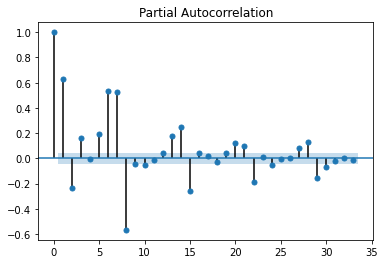

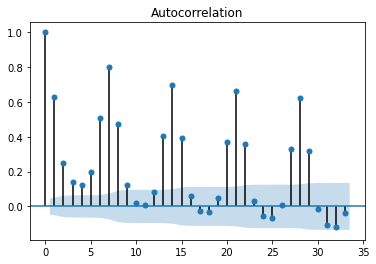

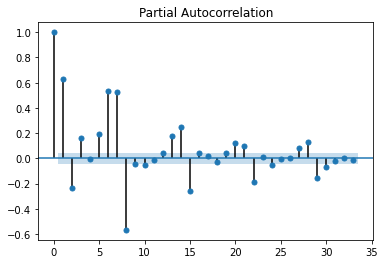

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plot_pacf(data)

In [ ]:
import numpy as np

def sampling(sequence, n_steps):

  X, Y = list(), list()

  for i in range(len(sequence)):

    sam = i + n_steps
    if sam > len(sequence)-1:
    break

   x, y = sequence[i:sam], sequence[sam]

    X.append(x)

    Y.append(y)

  return np.array(X), np.array(Y)



In [7]:
X_train = data.iloc[0:-30,:]
X_test = data.iloc[-30:,:]
#y_origin = data.iloc[-1:,:]
#print(X_train.tail())
x_train = X_train['value'].tolist()
print(x_train)
print(X_test)
#print(y_origin)
x_test = X_test['value'].values
#y_origin = y_origin['value'].values
#x_test = X_test['value'].tolist()
print(x_test)
y_origin = x_test[-7:]
print(y_origin)
#print(np.count_nonzero(x_train))

[620107.7, 659865.2, 632536.8, 610251.7, 572534.1, 695639.1, 706449.4, 690826.9, 679167.8, 623223.8, 605764.0, 686722.4, 720772.8, 720478.2, 720680.9, 711405.3, 646256.3, 617015.7, 705159.4, 723256.1, 721350.7, 715717.6, 695857.2, 649147.0, 617790.9, 705275.4, 731188.6, 717592.0, 732972.4, 723374.2, 659033.1, 615641.4, 714625.6, 737985.1, 745899.9, 734933.5, 724525.2, 678370.6, 636377.4, 735032.6, 733738.9, 724483.8, 728141.7, 718545.6, 650288.5, 606214.3, 695338.9, 704619.5, 709134.9, 718318.3, 704032.8, 609064.8, 614258.3, 687451.9, 715736.9, 698719.5, 682615.4, 688477.3, 623826.1, 598826.9, 708156.9, 720784.9, 698624.5, 681712.3, 661594.3, 615142.4, 582936.3, 670582.9, 677684.5, 672762.5, 659975.0, 654450.6, 599835.4, 570472.5, 650063.2, 668712.2, 635286.9, 644650.8, 633165.6, 605601.2, 562876.2, 665579.4, 694605.0, 690932.0, 667971.5, 668574.1, 618435.7, 542883.8, 652974.6, 665124.5, 653093.8, 654310.3, 651746.7, 606456.6, 550330.9, 638117.3, 634316.0, 630156.8, 614623.2, 615731.7,

In [8]:
import numpy as np
n_steps = 23
#X_train = X_train['value'].tolist()

X = []
Y = []

for i in range(23, len(x_train)-7):
    X.append(x_train[i-23:i])
    Y.append(x_train[i:i+7])
X, Y = np.array(X), np.array(Y)


#X, Y = sampling(X_train['value'].tolist())
for i in range(len(X)):

  print(X[i], Y[i])



Streaming output truncated to the last 5000 lines.
 493952.9 509982.8 493489.3 519369.1 599852.2 609543.7 626776.  632210.4
 587700.3 535699.2 617452.7 617857.7 598962.7 508350.  535445. ] [553572.7 521703.2 609786.3 629316.8 627304.7 636733.8 650400.5]
[615731.7 585664.5 546228.3 603321.5 606023.8 583326.6 508530.7 493952.9
 509982.8 493489.3 519369.1 599852.2 609543.7 626776.  632210.4 587700.3
 535699.2 617452.7 617857.7 598962.7 508350.  535445.  553572.7] [521703.2 609786.3 629316.8 627304.7 636733.8 650400.5 577750.8]
[585664.5 546228.3 603321.5 606023.8 583326.6 508530.7 493952.9 509982.8
 493489.3 519369.1 599852.2 609543.7 626776.  632210.4 587700.3 535699.2
 617452.7 617857.7 598962.7 508350.  535445.  553572.7 521703.2] [609786.3 629316.8 627304.7 636733.8 650400.5 577750.8 534583.1]
[546228.3 603321.5 606023.8 583326.6 508530.7 493952.9 509982.8 493489.3
 519369.1 599852.2 609543.7 626776.  632210.4 587700.3 535699.2 617452.7
 617857.7 598962.7 508350.  535445.  553572.7 52

In [10]:
X_train = np.reshape(X, (X.shape[0], X.shape[1], 1))
Y_train = np.reshape(Y, (Y.shape[0], Y.shape[1], 1))
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(y_origin.shape)
#X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Y_test = np.reshape(y_origin, (y_origin.shape[0], y_origin.shape[1], 1))
#print(X_test.shape)
#print(Y_test.shape)

(1765, 23, 1)
(1765, 7, 1)
(30, 1)
(7,)


In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
#from keras import models

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units = 7))
model.compile(optimizer='adam', loss='mse')

In [12]:
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)

(1765, 23, 1)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 7)                 357       
                                                                 
Total params: 10,757
Trainable params: 10,757
Non-trainable params: 0
_________________________________________________________________


In [14]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Feb  8 09:02:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    58W / 149W |    147MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
model.fit(X_train, Y_train, epochs=200, verbose=0,batch_size=32)

In [16]:
model.save("/content/drive/MyDrive/AI_ML_Projects/Electric_Load_Forecasting_Purely_Time_Series_Demo_Project/dipam/lstm.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
x_test = X_test['value'].values
x_test

array([597570.6, 685913.4, 697872. , 688046.4, 609466.9, 649482.1,
       609660.8, 591087.6, 700153.2, 713930.4, 724397. , 731645.7,
       723897. , 657183.1, 614771.8, 727126.8, 741257.1, 727532.5,
       718927.8, 696422.1, 624097.1, 585545.9, 596095.6, 527281.8,
       612702.5, 649103.9, 639571.2, 602541.7, 574254.2, 597701.2])

In [18]:
x_test = x_test[:-7]
x_test

array([597570.6, 685913.4, 697872. , 688046.4, 609466.9, 649482.1,
       609660.8, 591087.6, 700153.2, 713930.4, 724397. , 731645.7,
       723897. , 657183.1, 614771.8, 727126.8, 741257.1, 727532.5,
       718927.8, 696422.1, 624097.1, 585545.9, 596095.6])

In [19]:
x_test = x_test.reshape((1, n_steps, 1))

In [20]:
y_pred = model.predict(x_test, verbose=0)
print(y_pred)

[[669140.4  670490.6  675360.2  659420.2  657917.06 660648.3  649978.5 ]]


In [21]:
#y_pred = np.reshape(y_pred, (y_origin.shape[0], y_origin.shape[1], 1))
print(y_pred)
print(y_origin)

[[669140.4  670490.6  675360.2  659420.2  657917.06 660648.3  649978.5 ]]
[527281.8 612702.5 649103.9 639571.2 602541.7 574254.2 597701.2]


In [22]:
from keras.models import load_model
new_model = load_model("/content/drive/MyDrive/AI_ML_Projects/Electric_Load_Forecasting_Purely_Time_Series_Demo_Project/dipam/lstm.h5")
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 7)                 357       
                                                                 
Total params: 10,757
Trainable params: 10,757
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_new = new_model.predict(x_test, verbose=0)
print(y_new)
#y_or = np.reshape(y_origin,(1,1))
print(y_origin)

[[669140.4  670490.6  675360.2  659420.2  657917.06 660648.3  649978.5 ]]
[527281.8 612702.5 649103.9 639571.2 602541.7 574254.2 597701.2]
